# Your First Neural Network

### Exercise objectives
- Write your first Neural Network
- Inspect some of the most important hyperparameters of Neural Networks

<hr>
<hr>


In this exercise, you will build your first Neural Network that will separate two classes.
Each data $X$ has only two coordinates $X = (x_1, x_2)$ and belongs to either the class 0 or to the class 1. It is called the `moons dataset`. 

As there are only two features, the points can be represented on a 2D-scatterplot, where the colors correspond to the two available classes: $\color{blue}{blue}$ and $\color{red}{red} $. Here is an example of such data : 

![Two moons](moons_example.png)



## 1. Create data

Here, we will use the scikit-learn `make_moons` function [(see documentation here)](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html) to create 2 moons that cannot be linearly separated. Each moon correspond to a class.

In [1]:


from tensorflow import keras
from utils.plots import plot_decision_regions

import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap
from keras.models import Sequential
from keras.layers import Dense


### Data generation
X, y = make_moons(n_samples=300, noise=None , random_state=0)




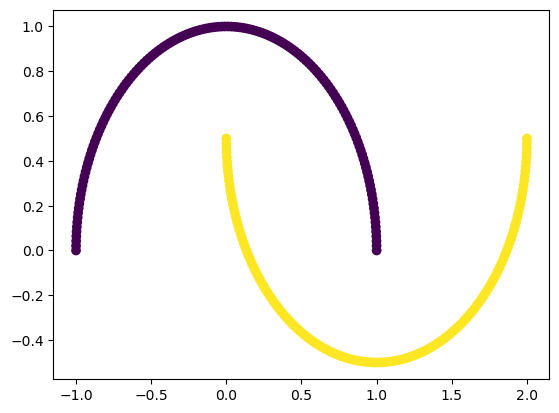

In [2]:
### This function allows to plot the two moons
plt.scatter(X[:,0], X[:,1], c=y)
plt.show()

❓ Play with the number of samples and the noise to discover the effects on the moons dataset, by plotting the moons for different values

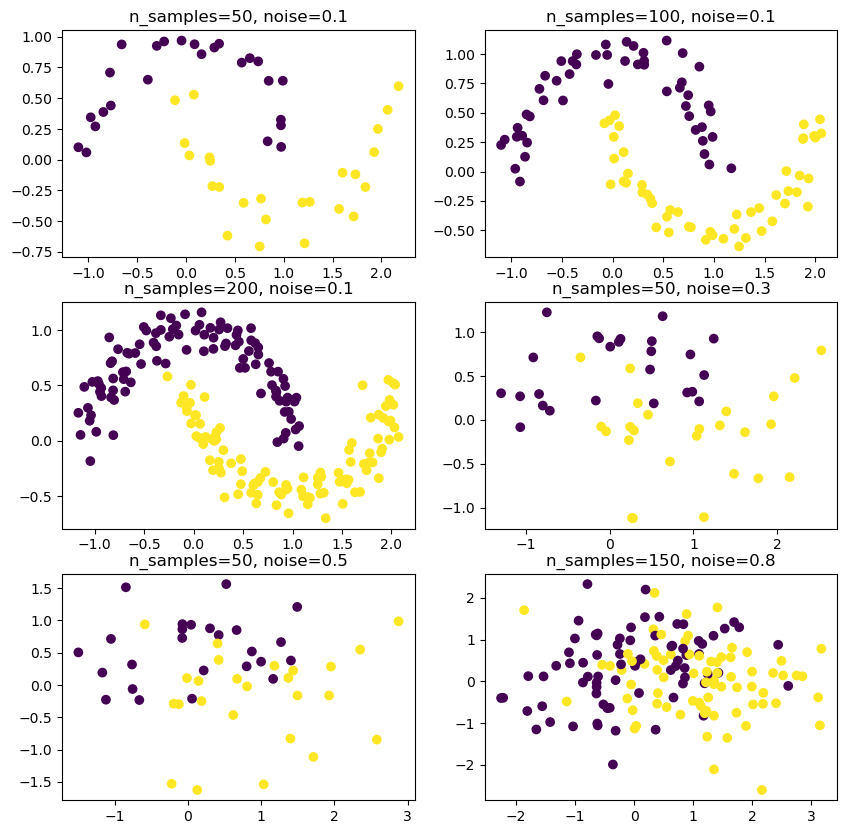

In [3]:
# Create data with different number of samples and noise levels
X1, y1 = make_moons(n_samples=50, noise=0.1, random_state=0)
X2, y2 = make_moons(n_samples=100, noise=0.1, random_state=0)
X3, y3 = make_moons(n_samples=200, noise=0.1, random_state=0)
X4, y4 = make_moons(n_samples=50, noise=0.3, random_state=0)
X5, y5 = make_moons(n_samples=50, noise=0.5, random_state=0)
X6, y6 = make_moons(n_samples=150, noise=0.8, random_state=0)

# Plot the data for different number of samples and noise levels
fig, axs = plt.subplots(3, 2, figsize=(10, 10))
axs[0, 0].scatter(X1[:,0], X1[:,1], c=y1)
axs[0, 0].set_title('n_samples=50, noise=0.1')
axs[0, 1].scatter(X2[:,0], X2[:,1], c=y2)
axs[0, 1].set_title('n_samples=100, noise=0.1')
axs[1, 0].scatter(X3[:,0], X3[:,1], c=y3)
axs[1, 0].set_title('n_samples=200, noise=0.1')
axs[1, 1].scatter(X4[:,0], X4[:,1], c=y4)
axs[1, 1].set_title('n_samples=50, noise=0.3')
axs[2, 0].scatter(X5[:,0], X5[:,1], c=y5)
axs[2, 0].set_title('n_samples=50, noise=0.5')
axs[2, 1].scatter(X6[:,0], X6[:,1], c=y6)
axs[2, 1].set_title('n_samples=150, noise=0.8')

plt.show()

❓ Draw 250 samples of the data with a noise equal to 0.20 (random state being 0) and split the initial dataset into a train and test set (size: 70/30%)

*Remark* : Please call the variables `X_train`, `y_train`, `X_test` and `y_test`

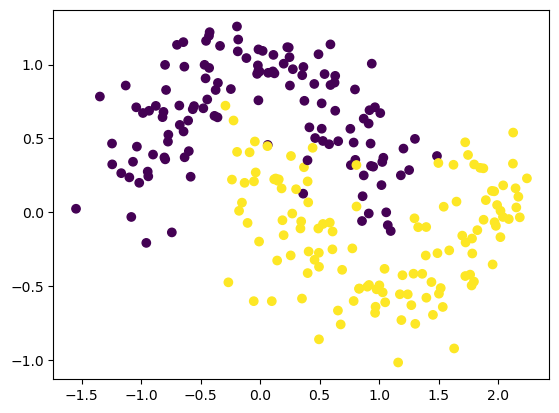

In [4]:

X, y = make_moons(n_samples=250, noise=0.2, random_state=0)


# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### This function allows to plot the two moons
plt.scatter(X[:,0], X[:,1], c=y)
plt.show()



## 2. Simple model

You will now define your first neural network.
The architecture of your model should have : 
- a first layer with 5 neurons, with a `relu` activation function and the correct input dimension
- a output layer suited to your 2-class classification task.


❓ Complete the next function with the previous architecture

In [5]:
def initialize_model():
    # Define the model
    model = Sequential()
    model.add(Dense(5, input_dim=2, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    return model

model = initialize_model()

❗ **Remark** ❗ Briefly speaking, the **`.compile()`** tells your algorithm how to optimize the weights of your network once it will be fit on real data. **`binary_crossentropy`** is the "log-loss" that you have have to use and explain

❓ How many parameters does the model have?  
Double check using the **`.summary()`** function which displays the stack of layers, the shape of the output after each layer, and the number of parameters of each layer. Use this function to check that you have 21 parameters i.e. weights in your model.

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 5)                 15        
                                                                 
 dense_1 (Dense)             (None, 1)                 6         
                                                                 
Total params: 21
Trainable params: 21
Non-trainable params: 0
_________________________________________________________________


You are now ready to train your algorithm on the training set:

In [7]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=200, batch_size=8)

Epoch 1/200
22/22 [==============================] - 0s 1ms/step - loss: 0.6648 - accuracy: 0.4914
Epoch 2/200
22/22 [==============================] - 0s 1ms/step - loss: 0.6469 - accuracy: 0.4914
Epoch 3/200
22/22 [==============================] - 0s 1ms/step - loss: 0.6306 - accuracy: 0.4514
Epoch 4/200
22/22 [==============================] - 0s 1ms/step - loss: 0.6156 - accuracy: 0.4629
Epoch 5/200
22/22 [==============================] - 0s 1ms/step - loss: 0.6023 - accuracy: 0.5257
Epoch 6/200
22/22 [==============================] - 0s 1ms/step - loss: 0.5893 - accuracy: 0.5714
Epoch 7/200
22/22 [==============================] - 0s 1ms/step - loss: 0.5772 - accuracy: 0.6857
Epoch 8/200
22/22 [==============================] - 0s 1ms/step - loss: 0.5662 - accuracy: 0.7714
Epoch 9/200
22/22 [==============================] - 0s 1ms/step - loss: 0.5551 - accuracy: 0.8000
Epoch 10/200
22/22 [==============================] - 0s 1ms/step - loss: 0.5447 - accuracy: 0.8114
Epoch 11/

22/22 [==============================] - 0s 859us/step - loss: 0.3076 - accuracy: 0.8629
Epoch 82/200
22/22 [==============================] - 0s 764us/step - loss: 0.3071 - accuracy: 0.8629
Epoch 83/200
22/22 [==============================] - 0s 812us/step - loss: 0.3066 - accuracy: 0.8629
Epoch 84/200
22/22 [==============================] - 0s 812us/step - loss: 0.3060 - accuracy: 0.8629
Epoch 85/200
22/22 [==============================] - 0s 859us/step - loss: 0.3055 - accuracy: 0.8629
Epoch 86/200
22/22 [==============================] - 0s 716us/step - loss: 0.3053 - accuracy: 0.8629
Epoch 87/200
22/22 [==============================] - 0s 1ms/step - loss: 0.3046 - accuracy: 0.8629
Epoch 88/200
22/22 [==============================] - 0s 907us/step - loss: 0.3040 - accuracy: 0.8629
Epoch 89/200
22/22 [==============================] - 0s 955us/step - loss: 0.3036 - accuracy: 0.8629
Epoch 90/200
22/22 [==============================] - 0s 859us/step - loss: 0.3034 - accuracy: 0.

22/22 [==============================] - 0s 859us/step - loss: 0.2778 - accuracy: 0.8800
Epoch 161/200
22/22 [==============================] - 0s 812us/step - loss: 0.2777 - accuracy: 0.8800
Epoch 162/200
22/22 [==============================] - 0s 764us/step - loss: 0.2774 - accuracy: 0.8800
Epoch 163/200
22/22 [==============================] - 0s 716us/step - loss: 0.2772 - accuracy: 0.8800
Epoch 164/200
22/22 [==============================] - 0s 764us/step - loss: 0.2770 - accuracy: 0.8800
Epoch 165/200
22/22 [==============================] - 0s 859us/step - loss: 0.2769 - accuracy: 0.8800
Epoch 166/200
22/22 [==============================] - 0s 812us/step - loss: 0.2767 - accuracy: 0.8800
Epoch 167/200
22/22 [==============================] - 0s 716us/step - loss: 0.2764 - accuracy: 0.8800
Epoch 168/200
22/22 [==============================] - 0s 812us/step - loss: 0.2761 - accuracy: 0.8800
Epoch 169/200
22/22 [==============================] - 0s 668us/step - loss: 0.2758 - a

### Fit history

`history` contains information about the training.

❓ Inspect all its attributes using `history.__dict__`. You will see epoch-by-epoch info stored in `history.history`

In [8]:

print(history.__dict__)
print(history.history)

{'validation_data': None, 'model': <keras.engine.sequential.Sequential object at 0x0000026EBA0E0610>, '_chief_worker_only': None, '_supports_tf_logs': False, 'history': {'loss': [0.6648145914077759, 0.6469240188598633, 0.6306332945823669, 0.6155612468719482, 0.6023492813110352, 0.5893343091011047, 0.5771783590316772, 0.5662260055541992, 0.5551159381866455, 0.5447273254394531, 0.5351061820983887, 0.5246843695640564, 0.515501081943512, 0.5064235925674438, 0.4975239634513855, 0.48883217573165894, 0.480623334646225, 0.4727279543876648, 0.46489304304122925, 0.4580337405204773, 0.4507775902748108, 0.4442330598831177, 0.43771323561668396, 0.4313521981239319, 0.42540091276168823, 0.4196687638759613, 0.4139004647731781, 0.40845322608947754, 0.4034096896648407, 0.3987070620059967, 0.394115686416626, 0.3894932270050049, 0.38548338413238525, 0.3811762034893036, 0.37765833735466003, 0.37389618158340454, 0.37045910954475403, 0.3674192726612091, 0.36409300565719604, 0.36101439595222473, 0.35814836621

❓ Plot the history of the train loss using the following function

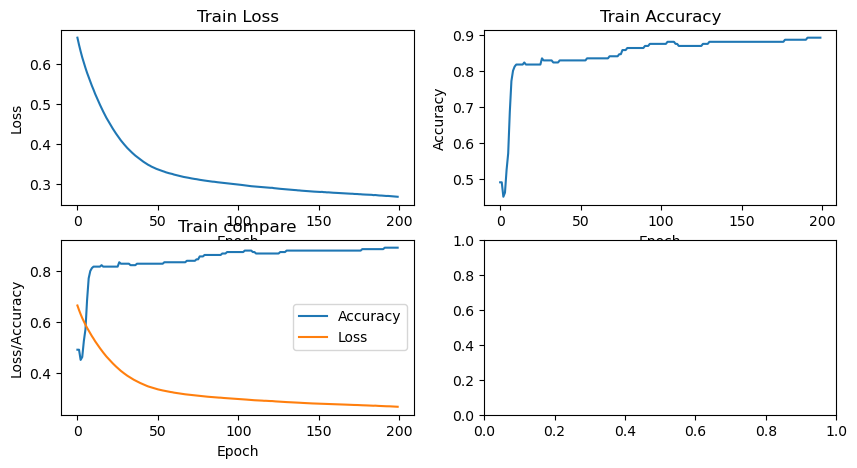

In [9]:
fig, axs = plt.subplots(2, 2, figsize=(10, 5))
axs[0, 0].plot(history.history['loss'])
axs[0, 0].set_title('Train Loss')
axs[0, 0].set_xlabel('Epoch')
axs[0, 0].set_ylabel('Loss')

axs[0, 1].plot(history.history['accuracy'])
axs[0, 1].set_title('Train Accuracy')
axs[0, 1].set_xlabel('Epoch')
axs[0, 1].set_ylabel('Accuracy')

axs[1, 0].plot(history.history['accuracy'], label = "Accuracy")
axs[1, 0].plot(history.history['loss'], label = "Loss")
axs[1, 0].set_title('Train compare')
axs[1, 0].set_xlabel('Epoch')
axs[1, 0].set_ylabel('Loss/Accuracy')
axs[1, 0].legend()
plt.show()

### Predict & Evaluate performance on test set

You can predict `y_pred` using the **`.predict()`** method.

In [10]:
y_pred = model.predict(X_test)

3/3 [==============================] - 0s 2ms/step


You can use the **`.evaluate()`** method to return the **`loss value`** &  and the **`performance metrics`**

In [11]:
test_loss, test_acc = model.evaluate(X_test, y_test)

3/3 [==============================] - 0s 2ms/step - loss: 0.2752 - accuracy: 0.8667


- The first element corresponds to the **loss** value, set to `"binary_crossentropy"` in `model.compile()`. Its value is hard to interpret.

- The second element is the **metrics**, that we set to `"accuracy"`

❓ What is your accuracy on the test test? Store the value as a `float` in the `accuracy` variable.

In [12]:
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

Test loss: 0.27515506744384766
Test accuracy: 0.8666666746139526


❓ Check your prediction visually by using our `plot_decision_regions` available in `utils/plots.py`. It looks a bit underfitted, right? We will create a deeper network next!

1940/1940 [==============================] - 1s 498us/step


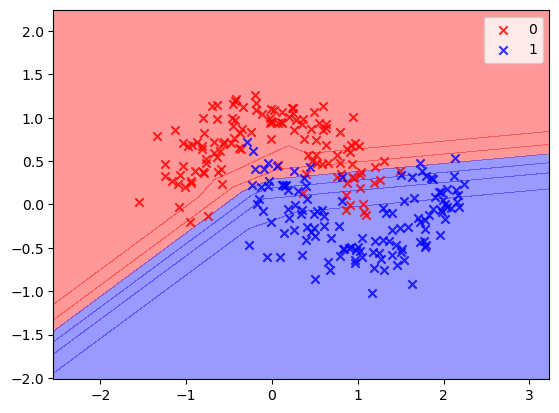

In [13]:

plot_decision_regions(X, y, model)


## 3. Variations

❓ Relaunch the model on 500 iterations
- Don't forget to call the `initialize_model` function, otherwise, your initial parameters will be those you have already learnt on the previous fit!!)
- Plot the history to see how the loss changed over the different epochs/iterations.

In [14]:
model = initialize_model()
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=500, batch_size=8)

Epoch 1/500
22/22 [==============================] - 0s 764us/step - loss: 0.5554 - accuracy: 0.7486
Epoch 2/500
22/22 [==============================] - 0s 764us/step - loss: 0.5375 - accuracy: 0.7714
Epoch 3/500
22/22 [==============================] - 0s 812us/step - loss: 0.5212 - accuracy: 0.7657
Epoch 4/500
22/22 [==============================] - 0s 812us/step - loss: 0.5063 - accuracy: 0.7657
Epoch 5/500
22/22 [==============================] - 0s 812us/step - loss: 0.4925 - accuracy: 0.7943
Epoch 6/500
22/22 [==============================] - 0s 812us/step - loss: 0.4797 - accuracy: 0.7943
Epoch 7/500
22/22 [==============================] - 0s 1ms/step - loss: 0.4675 - accuracy: 0.7943
Epoch 8/500
22/22 [==============================] - 0s 955us/step - loss: 0.4569 - accuracy: 0.7886
Epoch 9/500
22/22 [==============================] - 0s 1ms/step - loss: 0.4468 - accuracy: 0.7886
Epoch 10/500
22/22 [==============================] - 0s 1ms/step - loss: 0.4381 - accuracy: 0.

22/22 [==============================] - 0s 907us/step - loss: 0.2972 - accuracy: 0.8629
Epoch 82/500
22/22 [==============================] - 0s 859us/step - loss: 0.2961 - accuracy: 0.8629
Epoch 83/500
22/22 [==============================] - 0s 955us/step - loss: 0.2963 - accuracy: 0.8629
Epoch 84/500
22/22 [==============================] - 0s 859us/step - loss: 0.2958 - accuracy: 0.8629
Epoch 85/500
22/22 [==============================] - 0s 859us/step - loss: 0.2953 - accuracy: 0.8629
Epoch 86/500
22/22 [==============================] - 0s 955us/step - loss: 0.2952 - accuracy: 0.8629
Epoch 87/500
22/22 [==============================] - 0s 907us/step - loss: 0.2949 - accuracy: 0.8629
Epoch 88/500
22/22 [==============================] - 0s 859us/step - loss: 0.2943 - accuracy: 0.8629
Epoch 89/500
22/22 [==============================] - 0s 716us/step - loss: 0.2940 - accuracy: 0.8629
Epoch 90/500
22/22 [==============================] - 0s 812us/step - loss: 0.2940 - accuracy: 

22/22 [==============================] - 0s 812us/step - loss: 0.2787 - accuracy: 0.8800
Epoch 161/500
22/22 [==============================] - 0s 764us/step - loss: 0.2786 - accuracy: 0.8800
Epoch 162/500
22/22 [==============================] - 0s 812us/step - loss: 0.2784 - accuracy: 0.8800
Epoch 163/500
22/22 [==============================] - 0s 812us/step - loss: 0.2781 - accuracy: 0.8800
Epoch 164/500
22/22 [==============================] - 0s 860us/step - loss: 0.2779 - accuracy: 0.8800
Epoch 165/500
22/22 [==============================] - 0s 764us/step - loss: 0.2775 - accuracy: 0.8800
Epoch 166/500
22/22 [==============================] - 0s 764us/step - loss: 0.2776 - accuracy: 0.8800
Epoch 167/500
22/22 [==============================] - 0s 764us/step - loss: 0.2772 - accuracy: 0.8800
Epoch 168/500
22/22 [==============================] - 0s 764us/step - loss: 0.2771 - accuracy: 0.8857
Epoch 169/500
22/22 [==============================] - 0s 764us/step - loss: 0.2766 - a

22/22 [==============================] - 0s 955us/step - loss: 0.2560 - accuracy: 0.8971
Epoch 240/500
22/22 [==============================] - 0s 1ms/step - loss: 0.2556 - accuracy: 0.8971
Epoch 241/500
22/22 [==============================] - 0s 907us/step - loss: 0.2552 - accuracy: 0.8971
Epoch 242/500
22/22 [==============================] - 0s 859us/step - loss: 0.2549 - accuracy: 0.8971
Epoch 243/500
22/22 [==============================] - 0s 812us/step - loss: 0.2547 - accuracy: 0.8971
Epoch 244/500
22/22 [==============================] - 0s 812us/step - loss: 0.2541 - accuracy: 0.8971
Epoch 245/500
22/22 [==============================] - 0s 859us/step - loss: 0.2537 - accuracy: 0.8971
Epoch 246/500
22/22 [==============================] - 0s 859us/step - loss: 0.2535 - accuracy: 0.8971
Epoch 247/500
22/22 [==============================] - 0s 812us/step - loss: 0.2530 - accuracy: 0.8971
Epoch 248/500
22/22 [==============================] - 0s 859us/step - loss: 0.2527 - acc

22/22 [==============================] - 0s 764us/step - loss: 0.2216 - accuracy: 0.9200
Epoch 320/500
22/22 [==============================] - 0s 812us/step - loss: 0.2213 - accuracy: 0.9200
Epoch 321/500
22/22 [==============================] - 0s 812us/step - loss: 0.2209 - accuracy: 0.9200
Epoch 322/500
22/22 [==============================] - 0s 907us/step - loss: 0.2204 - accuracy: 0.9200
Epoch 323/500
22/22 [==============================] - 0s 859us/step - loss: 0.2200 - accuracy: 0.9200
Epoch 324/500
22/22 [==============================] - 0s 907us/step - loss: 0.2197 - accuracy: 0.9200
Epoch 325/500
22/22 [==============================] - 0s 764us/step - loss: 0.2190 - accuracy: 0.9200
Epoch 326/500
22/22 [==============================] - 0s 764us/step - loss: 0.2186 - accuracy: 0.9200
Epoch 327/500
22/22 [==============================] - 0s 764us/step - loss: 0.2181 - accuracy: 0.9200
Epoch 328/500
22/22 [==============================] - 0s 764us/step - loss: 0.2181 - a

22/22 [==============================] - 0s 859us/step - loss: 0.1899 - accuracy: 0.9314
Epoch 399/500
22/22 [==============================] - 0s 812us/step - loss: 0.1895 - accuracy: 0.9371
Epoch 400/500
22/22 [==============================] - 0s 716us/step - loss: 0.1891 - accuracy: 0.9371
Epoch 401/500
22/22 [==============================] - 0s 812us/step - loss: 0.1891 - accuracy: 0.9371
Epoch 402/500
22/22 [==============================] - 0s 716us/step - loss: 0.1885 - accuracy: 0.9371
Epoch 403/500
22/22 [==============================] - 0s 812us/step - loss: 0.1888 - accuracy: 0.9371
Epoch 404/500
22/22 [==============================] - 0s 764us/step - loss: 0.1885 - accuracy: 0.9371
Epoch 405/500
22/22 [==============================] - 0s 812us/step - loss: 0.1873 - accuracy: 0.9371
Epoch 406/500
22/22 [==============================] - 0s 716us/step - loss: 0.1870 - accuracy: 0.9371
Epoch 407/500
22/22 [==============================] - 0s 812us/step - loss: 0.1868 - a

22/22 [==============================] - 0s 859us/step - loss: 0.1629 - accuracy: 0.9429
Epoch 478/500
22/22 [==============================] - 0s 716us/step - loss: 0.1627 - accuracy: 0.9429
Epoch 479/500
22/22 [==============================] - 0s 764us/step - loss: 0.1624 - accuracy: 0.9429
Epoch 480/500
22/22 [==============================] - 0s 859us/step - loss: 0.1620 - accuracy: 0.9429
Epoch 481/500
22/22 [==============================] - 0s 1ms/step - loss: 0.1615 - accuracy: 0.9429
Epoch 482/500
22/22 [==============================] - 0s 907us/step - loss: 0.1611 - accuracy: 0.9429
Epoch 483/500
22/22 [==============================] - 0s 859us/step - loss: 0.1612 - accuracy: 0.9486
Epoch 484/500
22/22 [==============================] - 0s 764us/step - loss: 0.1605 - accuracy: 0.9429
Epoch 485/500
22/22 [==============================] - 0s 812us/step - loss: 0.1605 - accuracy: 0.9486
Epoch 486/500
22/22 [==============================] - 0s 716us/step - loss: 0.1601 - acc

❓ Did the test accuracy improve?

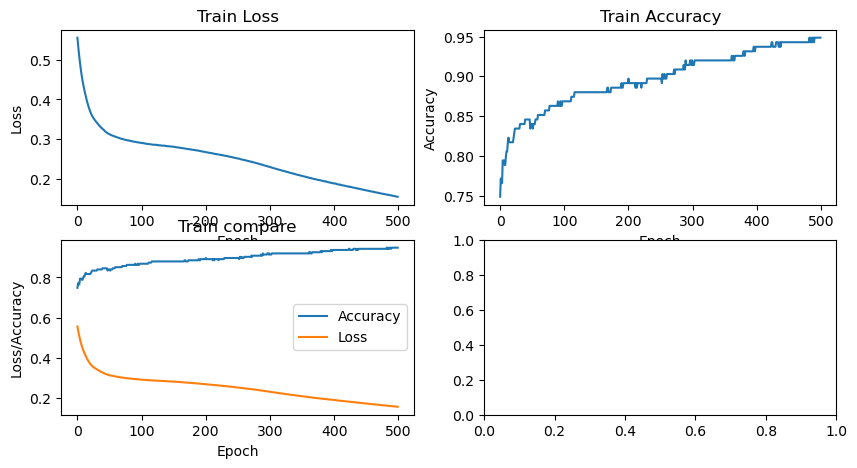

1940/1940 [==============================] - 1s 461us/step


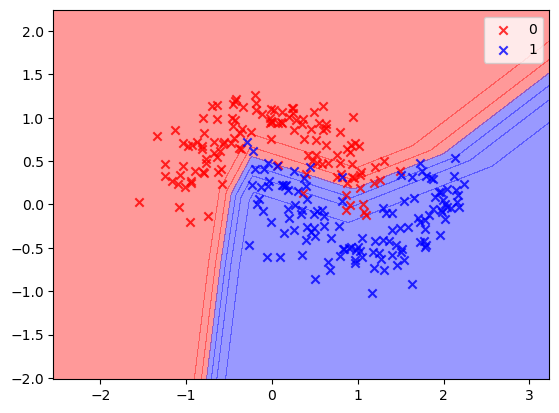

In [15]:
fig, axs = plt.subplots(2, 2, figsize=(10, 5))
axs[0, 0].plot(history.history['loss'])
axs[0, 0].set_title('Train Loss')
axs[0, 0].set_xlabel('Epoch')
axs[0, 0].set_ylabel('Loss')

axs[0, 1].plot(history.history['accuracy'])
axs[0, 1].set_title('Train Accuracy')
axs[0, 1].set_xlabel('Epoch')
axs[0, 1].set_ylabel('Accuracy')

axs[1, 0].plot(history.history['accuracy'], label = "Accuracy")
axs[1, 0].plot(history.history['loss'], label = "Loss")
axs[1, 0].set_title('Train compare')
axs[1, 0].set_xlabel('Epoch')
axs[1, 0].set_ylabel('Loss/Accuracy')
axs[1, 0].legend()
plt.show()


plot_decision_regions(X, y, model)

Not necessarily...So when should we stop training a Deep Learning Model?
Answer in the next chapter `Optimizers, Loss, Fitting` of this `Deep Learning Module` !

❓ Let's try a **deeper** architecture that includes : 

- a first layer with 20 neurons (activation: `"relu"`)
- a second layer with 10 neurons (activation: `"relu"`)
- a third layer with 5 neurons (activation: `"relu"`)
- an output layer suited for this problem


❓ What is the number of parameters of your new model?

In [16]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 5)                 15        
                                                                 
 dense_3 (Dense)             (None, 1)                 6         
                                                                 
Total params: 21
Trainable params: 21
Non-trainable params: 0
_________________________________________________________________


Run your model on the previous data with 500 epochs and plot the loss afterwards.  
❓ What is your accuracy on the test test? Store it as `accuracy_deep` variable (`float`).

In [17]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=500, batch_size=8)

Epoch 1/500
22/22 [==============================] - 0s 812us/step - loss: 0.1555 - accuracy: 0.9486
Epoch 2/500
22/22 [==============================] - 0s 764us/step - loss: 0.1548 - accuracy: 0.9486
Epoch 3/500
22/22 [==============================] - 0s 859us/step - loss: 0.1547 - accuracy: 0.9486
Epoch 4/500
22/22 [==============================] - 0s 812us/step - loss: 0.1541 - accuracy: 0.9486
Epoch 5/500
22/22 [==============================] - 0s 716us/step - loss: 0.1536 - accuracy: 0.9486
Epoch 6/500
22/22 [==============================] - 0s 812us/step - loss: 0.1534 - accuracy: 0.9486
Epoch 7/500
22/22 [==============================] - 0s 859us/step - loss: 0.1532 - accuracy: 0.9486
Epoch 8/500
22/22 [==============================] - 0s 1ms/step - loss: 0.1529 - accuracy: 0.9486
Epoch 9/500
22/22 [==============================] - 0s 812us/step - loss: 0.1524 - accuracy: 0.9486
Epoch 10/500
22/22 [==============================] - 0s 812us/step - loss: 0.1518 - accuracy

22/22 [==============================] - 0s 1ms/step - loss: 0.1278 - accuracy: 0.9657
Epoch 82/500
22/22 [==============================] - 0s 907us/step - loss: 0.1274 - accuracy: 0.9657
Epoch 83/500
22/22 [==============================] - 0s 812us/step - loss: 0.1271 - accuracy: 0.9657
Epoch 84/500
22/22 [==============================] - 0s 812us/step - loss: 0.1267 - accuracy: 0.9657
Epoch 85/500
22/22 [==============================] - 0s 764us/step - loss: 0.1264 - accuracy: 0.9657
Epoch 86/500
22/22 [==============================] - 0s 955us/step - loss: 0.1262 - accuracy: 0.9657
Epoch 87/500
22/22 [==============================] - 0s 859us/step - loss: 0.1264 - accuracy: 0.9657
Epoch 88/500
22/22 [==============================] - 0s 1ms/step - loss: 0.1254 - accuracy: 0.9657
Epoch 89/500
22/22 [==============================] - 0s 955us/step - loss: 0.1249 - accuracy: 0.9600
Epoch 90/500
22/22 [==============================] - 0s 907us/step - loss: 0.1246 - accuracy: 0.96

Epoch 161/500
22/22 [==============================] - 0s 668us/step - loss: 0.1044 - accuracy: 0.9657
Epoch 162/500
22/22 [==============================] - 0s 764us/step - loss: 0.1042 - accuracy: 0.9657
Epoch 163/500
22/22 [==============================] - 0s 764us/step - loss: 0.1041 - accuracy: 0.9657
Epoch 164/500
22/22 [==============================] - 0s 907us/step - loss: 0.1039 - accuracy: 0.9657
Epoch 165/500
22/22 [==============================] - 0s 764us/step - loss: 0.1036 - accuracy: 0.9657
Epoch 166/500
22/22 [==============================] - 0s 812us/step - loss: 0.1033 - accuracy: 0.9657
Epoch 167/500
22/22 [==============================] - 0s 764us/step - loss: 0.1030 - accuracy: 0.9657
Epoch 168/500
22/22 [==============================] - 0s 859us/step - loss: 0.1029 - accuracy: 0.9657
Epoch 169/500
22/22 [==============================] - 0s 812us/step - loss: 0.1025 - accuracy: 0.9657
Epoch 170/500
22/22 [==============================] - 0s 859us/step - lo

22/22 [==============================] - 0s 955us/step - loss: 0.0895 - accuracy: 0.9771
Epoch 241/500
22/22 [==============================] - 0s 764us/step - loss: 0.0893 - accuracy: 0.9771
Epoch 242/500
22/22 [==============================] - 0s 764us/step - loss: 0.0894 - accuracy: 0.9771
Epoch 243/500
22/22 [==============================] - 0s 716us/step - loss: 0.0888 - accuracy: 0.9771
Epoch 244/500
22/22 [==============================] - 0s 812us/step - loss: 0.0888 - accuracy: 0.9771
Epoch 245/500
22/22 [==============================] - 0s 812us/step - loss: 0.0888 - accuracy: 0.9771
Epoch 246/500
22/22 [==============================] - 0s 859us/step - loss: 0.0889 - accuracy: 0.9771
Epoch 247/500
22/22 [==============================] - 0s 1ms/step - loss: 0.0884 - accuracy: 0.9771
Epoch 248/500
22/22 [==============================] - 0s 907us/step - loss: 0.0883 - accuracy: 0.9771
Epoch 249/500
22/22 [==============================] - 0s 812us/step - loss: 0.0883 - acc

22/22 [==============================] - 0s 764us/step - loss: 0.0778 - accuracy: 0.9714
Epoch 320/500
22/22 [==============================] - 0s 668us/step - loss: 0.0779 - accuracy: 0.9714
Epoch 321/500
22/22 [==============================] - 0s 812us/step - loss: 0.0777 - accuracy: 0.9714
Epoch 322/500
22/22 [==============================] - 0s 764us/step - loss: 0.0776 - accuracy: 0.9714
Epoch 323/500
22/22 [==============================] - 0s 812us/step - loss: 0.0774 - accuracy: 0.9714
Epoch 324/500
22/22 [==============================] - 0s 716us/step - loss: 0.0777 - accuracy: 0.9771
Epoch 325/500
22/22 [==============================] - 0s 812us/step - loss: 0.0771 - accuracy: 0.9771
Epoch 326/500
22/22 [==============================] - 0s 764us/step - loss: 0.0771 - accuracy: 0.9771
Epoch 327/500
22/22 [==============================] - 0s 812us/step - loss: 0.0771 - accuracy: 0.9714
Epoch 328/500
22/22 [==============================] - 0s 716us/step - loss: 0.0768 - a

22/22 [==============================] - 0s 907us/step - loss: 0.0692 - accuracy: 0.9771
Epoch 399/500
22/22 [==============================] - 0s 859us/step - loss: 0.0692 - accuracy: 0.9771
Epoch 400/500
22/22 [==============================] - 0s 955us/step - loss: 0.0691 - accuracy: 0.9771
Epoch 401/500
22/22 [==============================] - 0s 907us/step - loss: 0.0690 - accuracy: 0.9771
Epoch 402/500
22/22 [==============================] - 0s 812us/step - loss: 0.0690 - accuracy: 0.9771
Epoch 403/500
22/22 [==============================] - 0s 859us/step - loss: 0.0688 - accuracy: 0.9771
Epoch 404/500
22/22 [==============================] - 0s 764us/step - loss: 0.0687 - accuracy: 0.9771
Epoch 405/500
22/22 [==============================] - 0s 859us/step - loss: 0.0692 - accuracy: 0.9771
Epoch 406/500
22/22 [==============================] - 0s 907us/step - loss: 0.0685 - accuracy: 0.9771
Epoch 407/500
22/22 [==============================] - 0s 811us/step - loss: 0.0685 - a

22/22 [==============================] - 0s 1ms/step - loss: 0.0635 - accuracy: 0.9771
Epoch 479/500
22/22 [==============================] - 0s 1ms/step - loss: 0.0633 - accuracy: 0.9771
Epoch 480/500
22/22 [==============================] - 0s 1ms/step - loss: 0.0633 - accuracy: 0.9771
Epoch 481/500
22/22 [==============================] - 0s 1ms/step - loss: 0.0637 - accuracy: 0.9771
Epoch 482/500
22/22 [==============================] - 0s 1ms/step - loss: 0.0633 - accuracy: 0.9771
Epoch 483/500
22/22 [==============================] - 0s 1ms/step - loss: 0.0633 - accuracy: 0.9771
Epoch 484/500
22/22 [==============================] - 0s 1ms/step - loss: 0.0631 - accuracy: 0.9771
Epoch 485/500
22/22 [==============================] - 0s 1ms/step - loss: 0.0632 - accuracy: 0.9771
Epoch 486/500
22/22 [==============================] - 0s 955us/step - loss: 0.0631 - accuracy: 0.9771
Epoch 487/500
22/22 [==============================] - 0s 1ms/step - loss: 0.0633 - accuracy: 0.9771
Ep

In [18]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 5)                 15        
                                                                 
 dense_3 (Dense)             (None, 1)                 6         
                                                                 
Total params: 21
Trainable params: 21
Non-trainable params: 0
_________________________________________________________________


In [19]:

accuracy_deep = model.history.history['accuracy'][-1:][0]
accuracy_deep

0.9828571677207947

❓ Do you think we have overfitted on the noise? Check it out below

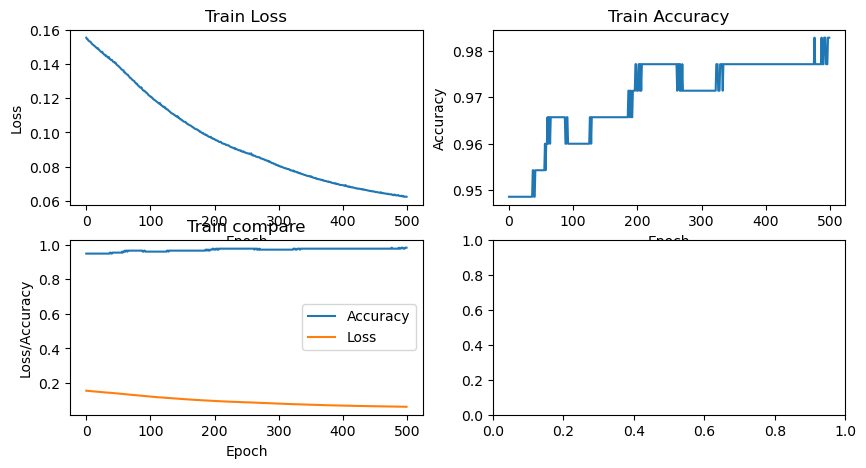

1940/1940 [==============================] - 1s 493us/step


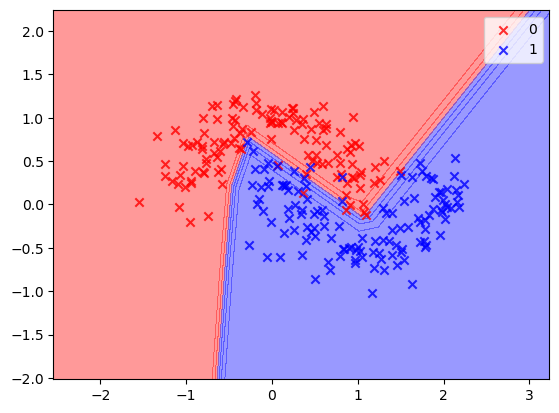

In [20]:
fig, axs = plt.subplots(2, 2, figsize=(10, 5))
axs[0, 0].plot(history.history['loss'])
axs[0, 0].set_title('Train Loss')
axs[0, 0].set_xlabel('Epoch')
axs[0, 0].set_ylabel('Loss')

axs[0, 1].plot(history.history['accuracy'])
axs[0, 1].set_title('Train Accuracy')
axs[0, 1].set_xlabel('Epoch')
axs[0, 1].set_ylabel('Accuracy')

axs[1, 0].plot(history.history['accuracy'], label = "Accuracy")
axs[1, 0].plot(history.history['loss'], label = "Loss")
axs[1, 0].set_title('Train compare')
axs[1, 0].set_xlabel('Epoch')
axs[1, 0].set_ylabel('Loss/Accuracy')
axs[1, 0].legend()
plt.show()

plot_decision_regions(X, y, model)

si je regarde les models de plot_decision_regions je constate qu'ils gagnent de plus en plus de précisions mais je comprends pas pour moins il ya des incoherences l'accuracy est deja a 0.99 avant la derniere partie ce qui du coup devrait etre suffisant mais pourtant quand on regarde le plot_decision_regions dans l'exercice d'avant il y a beaucoup de points qui sont hors de leurs champs. tant dis qu'ici il y en a tres peu. 

je dirais donc que si je me fi à Accuracy et loss je suis sur-entrainé en revanche si je me fis au model graphique de plot_decision_regions je pense que c'est bien comme ca peu etre aurait pu en faire un peu moins

In [21]:


model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=150, batch_size=10)



Epoch 1/150
18/18 [==============================] - 0s 885us/step - loss: 0.0625 - accuracy: 0.9771
Epoch 2/150
18/18 [==============================] - 0s 944us/step - loss: 0.0624 - accuracy: 0.9771
Epoch 3/150
18/18 [==============================] - 0s 944us/step - loss: 0.0619 - accuracy: 0.9771
Epoch 4/150
18/18 [==============================] - 0s 1ms/step - loss: 0.0619 - accuracy: 0.9771
Epoch 5/150
18/18 [==============================] - 0s 944us/step - loss: 0.0619 - accuracy: 0.9829
Epoch 6/150
18/18 [==============================] - 0s 1ms/step - loss: 0.0618 - accuracy: 0.9829
Epoch 7/150
18/18 [==============================] - 0s 944us/step - loss: 0.0618 - accuracy: 0.9829
Epoch 8/150
18/18 [==============================] - 0s 944us/step - loss: 0.0617 - accuracy: 0.9829
Epoch 9/150
18/18 [==============================] - 0s 826us/step - loss: 0.0619 - accuracy: 0.9829
Epoch 10/150
18/18 [==============================] - 0s 826us/step - loss: 0.0617 - accuracy: 

18/18 [==============================] - 0s 1ms/step - loss: 0.0586 - accuracy: 0.9829
Epoch 82/150
18/18 [==============================] - 0s 767us/step - loss: 0.0585 - accuracy: 0.9886
Epoch 83/150
18/18 [==============================] - 0s 826us/step - loss: 0.0583 - accuracy: 0.9886
Epoch 84/150
18/18 [==============================] - 0s 708us/step - loss: 0.0582 - accuracy: 0.9886
Epoch 85/150
18/18 [==============================] - 0s 826us/step - loss: 0.0582 - accuracy: 0.9829
Epoch 86/150
18/18 [==============================] - 0s 885us/step - loss: 0.0581 - accuracy: 0.9829
Epoch 87/150
18/18 [==============================] - 0s 826us/step - loss: 0.0580 - accuracy: 0.9829
Epoch 88/150
18/18 [==============================] - 0s 944us/step - loss: 0.0584 - accuracy: 0.9829
Epoch 89/150
18/18 [==============================] - 0s 1ms/step - loss: 0.0581 - accuracy: 0.9829
Epoch 90/150
18/18 [==============================] - 0s 1ms/step - loss: 0.0579 - accuracy: 0.9829

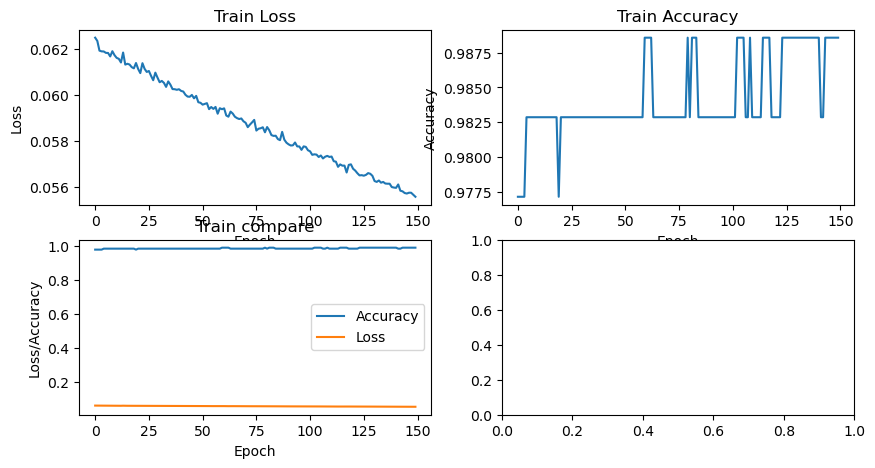

1940/1940 [==============================] - 1s 525us/step


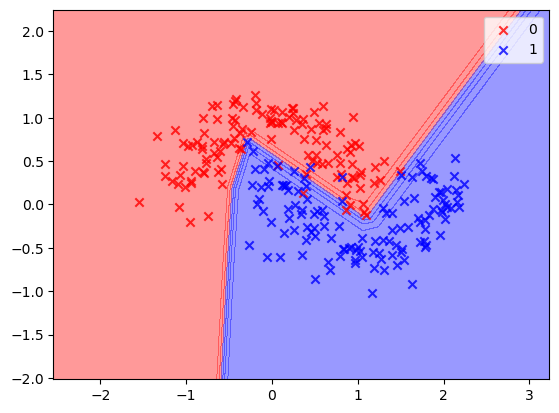

In [22]:
fig, axs = plt.subplots(2, 2, figsize=(10, 5))
axs[0, 0].plot(history.history['loss'])
axs[0, 0].set_title('Train Loss')
axs[0, 0].set_xlabel('Epoch')
axs[0, 0].set_ylabel('Loss')

axs[0, 1].plot(history.history['accuracy'])
axs[0, 1].set_title('Train Accuracy')
axs[0, 1].set_xlabel('Epoch')
axs[0, 1].set_ylabel('Accuracy')

axs[1, 0].plot(history.history['accuracy'], label = "Accuracy")
axs[1, 0].plot(history.history['loss'], label = "Loss")
axs[1, 0].set_title('Train compare')
axs[1, 0].set_xlabel('Epoch')
axs[1, 0].set_ylabel('Loss/Accuracy')
axs[1, 0].legend()
plt.show()

plot_decision_regions(X, y, model)